In [1]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
df = pd.read_csv('/Users/jacobsanderson/Documents/DiPACE/credit_cfs.csv')
df2 = pd.read_csv('/Users/jacobsanderson/Documents/DiPACE/datasets/credit.csv')

In [3]:
encoder = LabelEncoder()
df2['Industry'] = encoder.fit_transform(df2['Industry'])
df2['Ethnicity'] = encoder.fit_transform(df2['Ethnicity'])
df2['Citizen'] = encoder.fit_transform(df2['Citizen'])
df2 = df2.drop(columns=['ZipCode'])

In [4]:
scaler = StandardScaler()
df2_standardized = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)
df_standardized = pd.DataFrame(scaler.transform(df), columns=df.columns)

In [6]:
df_standardized = df_standardized.drop(columns=['Approved'])
df2_standardized = df2_standardized.drop(columns=['Approved'])

In [7]:
tsne = TSNE(n_components=2, perplexity=5, random_state=42) 
tsne_results = tsne.fit_transform(df_standardized)
tsne_results2 = tsne.fit_transform(df2_standardized)

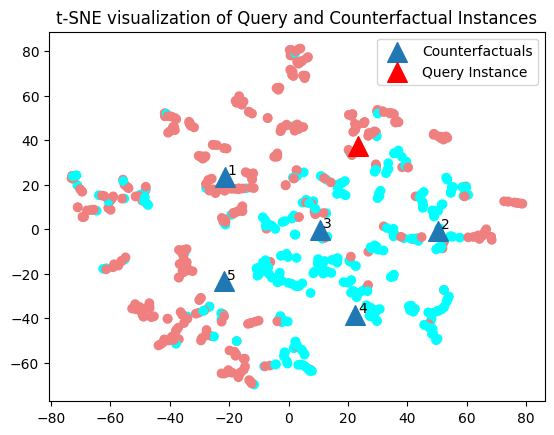

In [16]:
colors = ['cyan' if approved == 1 else 'lightcoral' for approved in df2['Approved']]
plt.scatter(tsne_results2[:, 0], tsne_results2[:, 1], c=colors)

plt.scatter(tsne_results[1:, 0], tsne_results[1:, 1], marker='^', s=200, label='Counterfactuals')
plt.scatter(tsne_results[0, 0], tsne_results[0, 1], color='red', s=200, marker='^', label='Query Instance')

for i, txt in enumerate(df.index):
    if i != 0:
        plt.annotate(txt, (tsne_results[i, 0] + 1, tsne_results[i, 1] + 1))

plt.legend()
plt.title("t-SNE visualization of Query and Counterfactual Instances")
plt.show()